In [1]:
import numpy as np
import pandas as pd
# numbers of pixels of x and y axis
xPixel = 48  
yPixel = 48

In [2]:
# 1. Load data
df = pd.read_csv("G:/TheErdosInstitution/DS_2024/face_data_train.csv", header=0) # specify the first row as header

In [5]:
# 2. Reshape the data 
# images = df.drop(columns=df.columns[-1]).sample(n=3000, axis='rows').values # remove the class column and sample 3000 images.
images = df.drop(columns=df.columns[-1]).values # remove the class column.
image_shape = (xPixel, yPixel)
images = images.reshape(-1, *image_shape)

In [6]:
# 3. Calculate mean face and subtract the mean
mean_face = np.mean(images, axis=0)
centered_images = images - mean_face

In [8]:
centered_images.reshape(images.shape[0], -1).shape

(28706, 2304)

In [9]:
# 4. Calculate covariance matrix of for faces
covariance_matrix = np.cov(centered_images.reshape(images.shape[0], -1).T)

In [10]:
# 5. Eigenvalue decomposition and select the top eigenfaces (e.g., top 10)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
k = 10
top_eigenfaces = eigenvectors[:, :k]

[0.2889453  0.38694044 0.48142653 ... 0.99999893 0.99999947 1.        ]


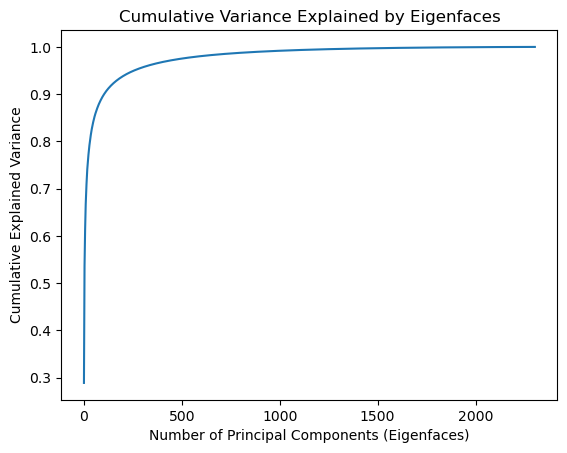

In [11]:
# Calculate the cumulative variance
total_variance = np.sum(eigenvalues)  # Total variance of the data
explained_variance = [(i / total_variance) for i in sorted(eigenvalues, reverse=True)]
cumulative_variance = np.cumsum(explained_variance)

# Print or visualize cumulative variance
print(cumulative_variance)

# Plot the cumulative variance
import matplotlib.pyplot as plt
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components (Eigenfaces)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by Eigenfaces')
plt.show()